In [99]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt

In [105]:
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]


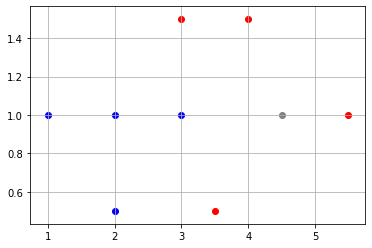

In [106]:
# scatter plot them
def visualise_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

visualise_data()

In [107]:
# activation function

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

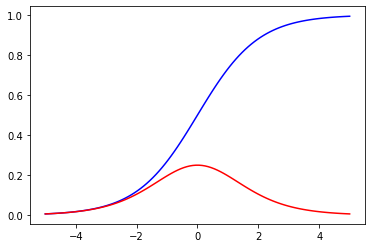

In [108]:
# plot activation function 

X = np.linspace(-5, 5, 100)

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
fig = plt.plot(X, sigmoid_prime(X), c="r") # sigmoid_prime in red

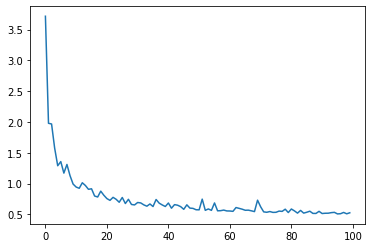

In [124]:
# training loop

def train():
    #randomly initialise weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()

    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down

    for i in range(iterations):
        ri = np.random.randint(len(data))  #random integers to index data
        point = data[ri]

        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # network's prediction 

        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1000 iterations
        
        if i % 100 == 0:
            cost_sum = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                cost_sum += np.square(p_pred - p[2])
            costs.append(cost_sum)

        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_prime(z)

        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1

        dcost_dz = dcost_dpred * dpred_dz

        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db

        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()

fig = plt.plot(costs)

In [125]:
# predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9878632796217182
close to 0 -> blue, close to 1 -> red


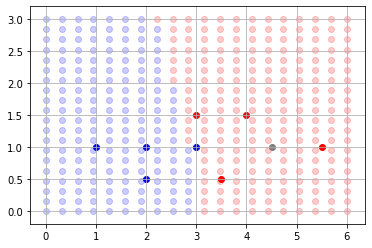

In [131]:
#  check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red

visualise_data()